## HW9 Timeseries Analysis written by dlk253 based on code from fb55. Group members included Jon Toy and Christian Rosado.

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
import json
import scipy.stats
import os
import zipfile as zf
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn
import requests
%pylab inline
%matplotlib nbagg


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Import the array shape data
# turn what you load into MTA Fare.npy to array of floats in order to bring in the NaN which not is not an integer.
# everything in the numpy array has to be the same type

In [3]:
data = (np.load('MTA_Fare.npy')).astype(float)

In [4]:
#we need to figure out if the item in the array is -1, if so then replace it with NaN
#for this procedure we wrote a nested for loop to get rid of -1 and replace it with NaN

In [5]:
shape = data.shape
for x in range(0, shape[0]):
    for y in range(0, shape[1]):
          for z in range(0, shape[2]):
                if data[x, y, z] == -1:
                    data[x, y, z] = np.nan
        



In [6]:
print data

[[[  5.69610000e+04   6.47030000e+04   6.80020000e+04 ...,   3.65270000e+04
     3.39290000e+04   3.68240000e+04]
  [  1.73200000e+03   2.08300000e+03   2.10700000e+03 ...,   1.26400000e+03
     1.17200000e+03   1.23800000e+03]
  [  2.03000000e+02   2.76000000e+02   2.45000000e+02 ...,   1.86000000e+02
     1.67000000e+02   1.67000000e+02]
  ..., 
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [             nan              nan              nan ...,   1.12100000e+03
     1.37700000e+03   7.12000000e+02]]

 [[  1.62100000e+04   2.01790000e+04   2.17690000e+04 ...,              nan
                nan              nan]
  [  5.03000000e+02   6.47000000e+02   6.65000000e+02 ...,              nan
                nan              nan]
  [  4.10000000e+01   4.30000000e+01   4.40000000e+01 ...,              nan
  

In [7]:
# significant event is 126 weeks in according to Jon Toy, but we have to show how that is done.
# find the mean, then find the standard deviation

In [8]:
#average of swipes per week for first station and first card type
np.nanmean(data[0,0,:])

58586.885416666664

In [9]:
#take the mean in the time direction, average over time
means = np.nanmean(data, axis = 2 )

/opt/rh/anaconda/root/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [10]:
#standard deviation
sigmas = np.nanstd(data, axis = 2 )

/opt/rh/anaconda/root/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


In [11]:
#plot the data, a single time series against its mean will be effective. 

In [12]:
thresholds = [np.array(means - 3 * sigmas), np.array (means + 3 * sigmas)]

<IPython.core.display.Javascript object>


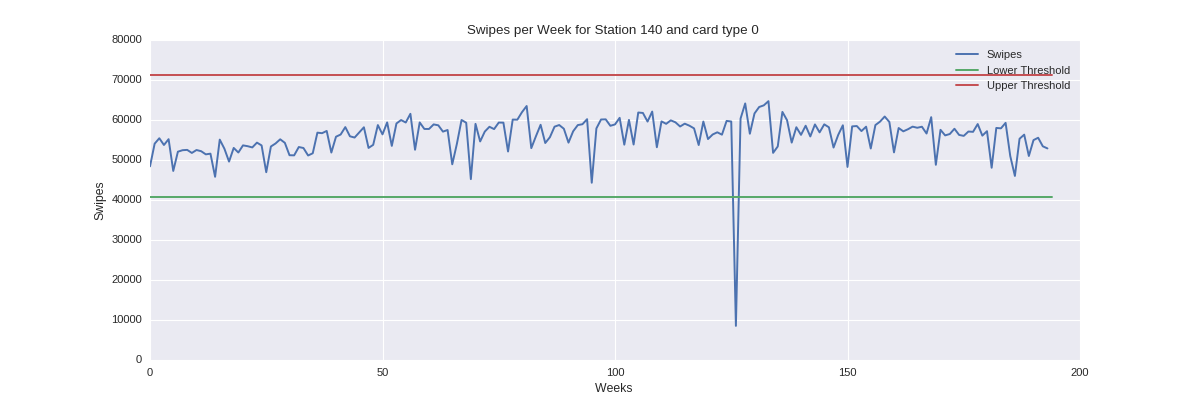

week below 3 sigma cutoff: [126]
week above 3 sigma cutoff: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193]


In [14]:

station = 140
card = 0

plt.figure(figsize=(15,5))
ax = pl.plot(data[station, card, :])
pl.plot([0,194],[thresholds[0][station, card], thresholds[0][station, card]])
pl.plot([0,194],[thresholds[1][station, card], thresholds[1][station, card]])
print('week below 3 sigma cutoff: ' + str(np.where(data[station, card, :]<thresholds[0][station, card])[0]))
print('week above 3 sigma cutoff: ' + str(np.where(data[station, card, :]>thresholds[0][station, card])[0]))
plt.title('Swipes per Week for Station 140 and card type 0 ')
plt.xlabel('Weeks ')
plt.ylabel('Swipes')
plt.legend(["Swipes", "Lower Threshold", "Upper Threshold"])



In [15]:
start = np.datetime64('2010-05-21')
time = [(start + np.timedelta64(event_weeks + 1, 'W')).astype(dt.datetime) for event_weeks in range(194)] 

<IPython.core.display.Javascript object>


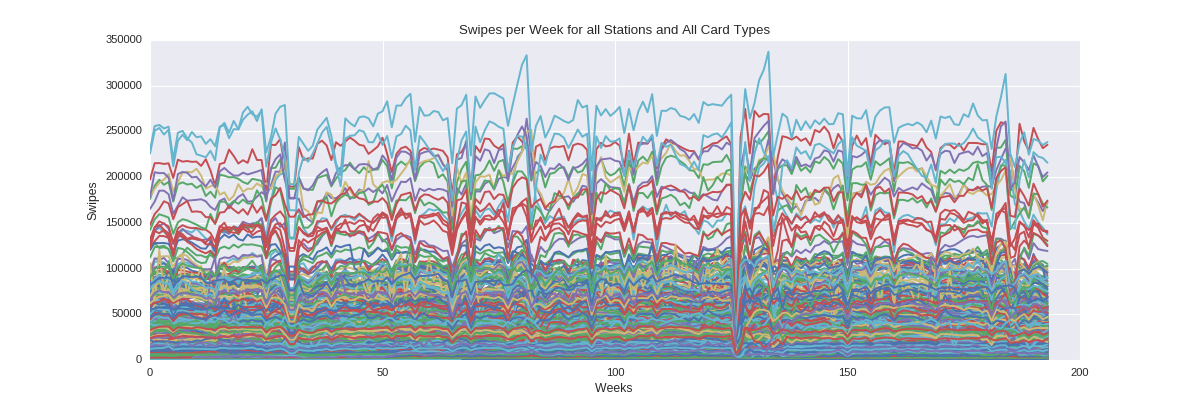

In [18]:
plt.figure(figsize=(15,5))
for x in range(0, shape[0]):
    for y in range(0, shape[1]):
       pl.plot(data[x, y, :])
plt.title('Swipes per Week for all Stations and All Card Types')
plt.xlabel('Weeks ')
plt.ylabel('Swipes')
plt.show()
      
         


<b>Figure 1:</b> put some info here

<IPython.core.display.Javascript object>


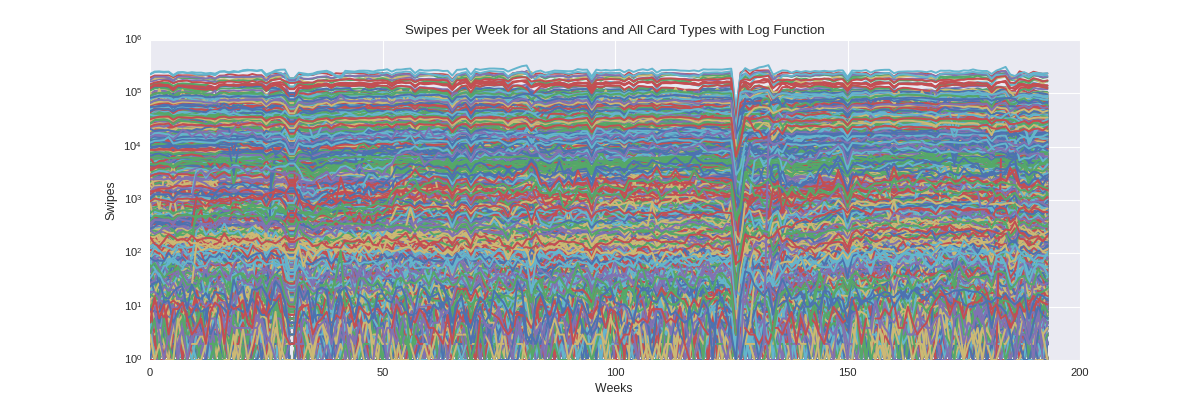

In [19]:
plt.figure(figsize=(15,5))
for x in range(0, shape[0]):
    for y in range(0, shape[1]):
        pl.semilogy(data[x, y, :])
plt.title('Swipes per Week for all Stations and All Card Types with Log Function')
plt.xlabel('Weeks ')
plt.ylabel('Swipes')
      

<b>Figure 2:</b> put some info here

In [16]:
#get the sum of the stations per card type, 0 axis, we collapsed the stations
new_data = np.nansum(data, axis = 0)
new_data


array([[  1.14946150e+07,   1.25268590e+07,   1.27666270e+07, ...,
          1.31896100e+07,   1.25007560e+07,   1.24599470e+07],
       [  5.30524000e+05,   5.83533000e+05,   5.86194000e+05, ...,
          6.95134000e+05,   6.70228000e+05,   6.79497000e+05],
       [  4.78010000e+04,   5.14860000e+04,   5.16360000e+04, ...,
          5.87710000e+04,   5.65250000e+04,   5.51920000e+04],
       ..., 
       [  6.12800000e+03,   6.12000000e+03,   6.49000000e+03, ...,
          5.39800000e+03,   5.75900000e+03,   6.18400000e+03],
       [  3.58000000e+02,   4.74000000e+02,   4.65000000e+02, ...,
          8.62000000e+02,   8.10000000e+02,   8.20000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.13272300e+06,   1.37940300e+06,   5.35018000e+05]])

In [17]:
import pandas as pd


In [18]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [19]:
#ridetype over weeks
df = pd.DataFrame(new_data, index=ridetype).transpose()
df

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,11494615.0,530524.0,47801.0,186551.0,46808.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,...,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,21060.0,6128.0,358.0,0.0
1,12526859.0,583533.0,51486.0,199229.0,64353.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,...,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,21670.0,6120.0,474.0,0.0
2,12766627.0,586194.0,51636.0,199668.0,56994.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,...,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,21433.0,6490.0,465.0,0.0
3,12653675.0,562602.0,52063.0,196389.0,37429.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,...,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,21630.0,6590.0,484.0,0.0
4,12809694.0,548858.0,51153.0,194883.0,35210.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,...,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,20297.0,6313.0,452.0,0.0
5,11429783.0,455691.0,46852.0,175648.0,46849.0,3663144.0,8286803.0,10282.0,346683.0,540555.0,...,111425.0,730531.0,54034.0,27469.0,1.0,113699.0,19800.0,6158.0,458.0,0.0
6,12346877.0,518187.0,48963.0,188467.0,60225.0,3918104.0,9271413.0,11361.0,310387.0,611962.0,...,140932.0,838630.0,65635.0,32065.0,2.0,114803.0,20816.0,6793.0,535.0,0.0
7,12576759.0,513412.0,49629.0,188090.0,47439.0,4028251.0,9306575.0,10950.0,345722.0,653871.0,...,138075.0,845227.0,65351.0,32159.0,3.0,120293.0,21497.0,7182.0,527.0,0.0
8,12437115.0,512192.0,49030.0,186822.0,32084.0,4030717.0,9145852.0,10723.0,348569.0,658757.0,...,136229.0,832235.0,64066.0,31284.0,0.0,123578.0,21620.0,7116.0,503.0,0.0
9,12431257.0,522569.0,50376.0,190528.0,52171.0,4032340.0,8906117.0,10574.0,364363.0,651734.0,...,134701.0,823236.0,63006.0,31600.0,4358.0,125819.0,21488.0,7373.0,506.0,0.0


In [20]:
df.columns

Index([u'10t', u'14d', u'1d', u'2t', u'30d', u'7d', u'ada', u'afas', u'exp',
       u'ez', u'ff', u'mc', u'mr', u'month', u'rfm', u'rr', u'sen', u'spec',
       u'tcmc', u't', u'umlim', u'xbus', u'stud'],
      dtype='object')

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()


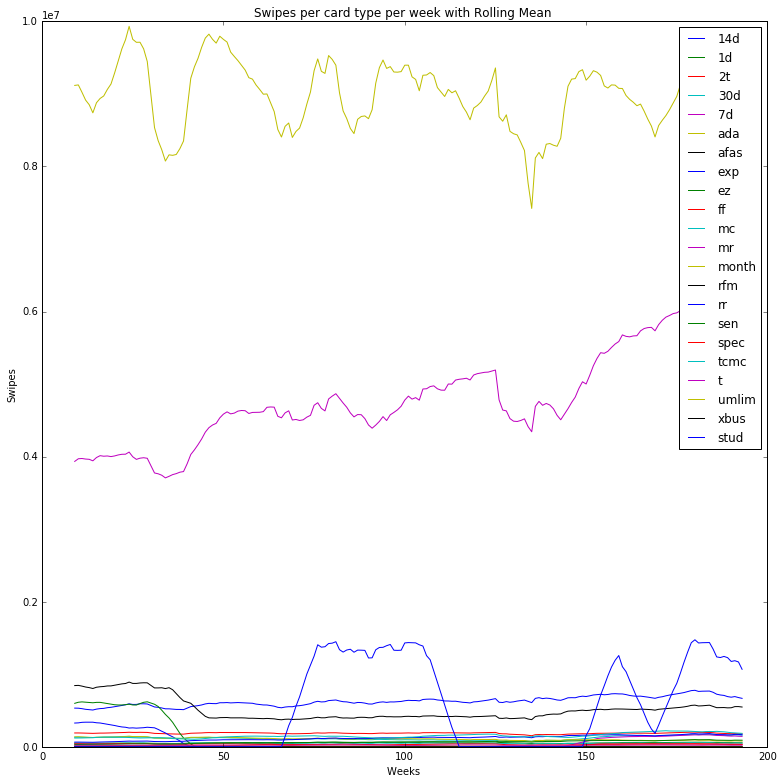

In [21]:
plt.figure(figsize=(13,13))
for card_types in df.columns[1:]:
    pl.plot(pd.rolling_mean(df[card_types], 10), label = card_types)
    pl.legend()
plt.title('Swipes per card type per week with Rolling Mean ')
plt.xlabel('Weeks ')
plt.ylabel('Swipes')   
      

<b>Figure 3:</b> Smoothing of the data

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()


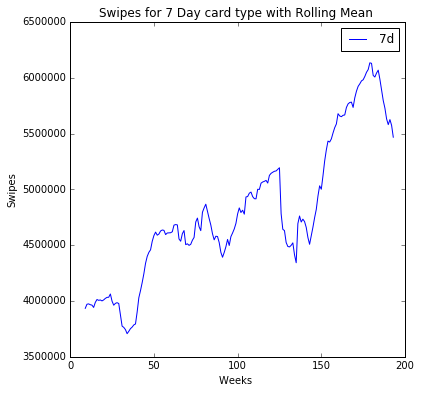

In [22]:
#extract the trend
plt.figure(figsize=(6,6))
pl.plot(pd.rolling_mean(df['7d'], 10), label = '7d')
pl.legend()
plt.title('Swipes for 7 Day card type with Rolling Mean ')
plt.xlabel('Weeks ')
plt.ylabel('Swipes')   

<b>Figure 4:</b> Visually the data has structure

In [23]:

#mean for the first ten weeks and mean for the last ten weeks

mean_first_ten= sum(df['7d'].loc[:10])/10
mean_last_ten=sum(df['7d'].loc[-10:])/10

In [33]:
print(mean_first_ten)
print(mean_last_ten)

4340670.3
93016296.2


In [57]:
new_data = np.nansum(data, axis=1).astype(int)
df_station = pd.DataFrame(new_data, columns=time).transpose()
df_station.head()



,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
2010-05-28,126878,37306,6606,16378,18564,19987,12449,11091,10482,147187,...,0,0,0,0,0,0,0,0,0,0
2010-06-04,149477,46464,6881,17408,19903,20625,13644,11659,11030,154826,...,0,0,0,0,0,0,0,0,0,0
2010-06-11,152383,49359,7229,17595,19948,21225,13719,12037,10881,155958,...,0,0,0,0,0,0,0,0,0,0
2010-06-18,160175,44849,5731,14242,16076,17412,11460,9809,9123,154914,...,0,0,0,0,0,0,0,0,0,0
2010-06-25,162641,41509,7032,17589,20283,20909,14094,11944,10923,157628,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>


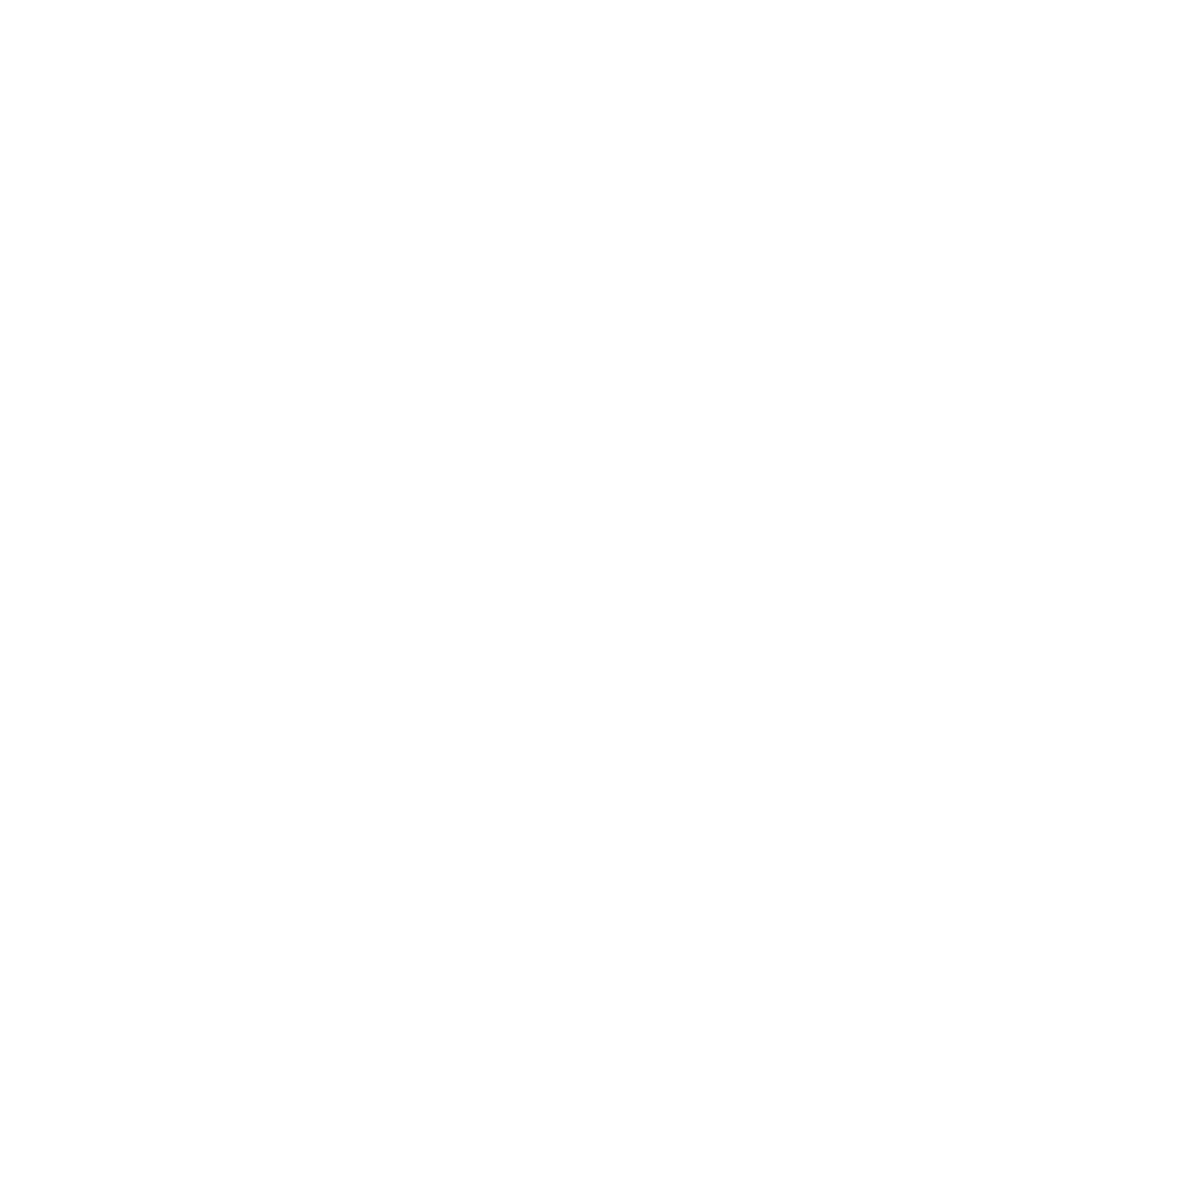

ValueError: x and y must have same first dimension

<IPython.core.display.Javascript object>


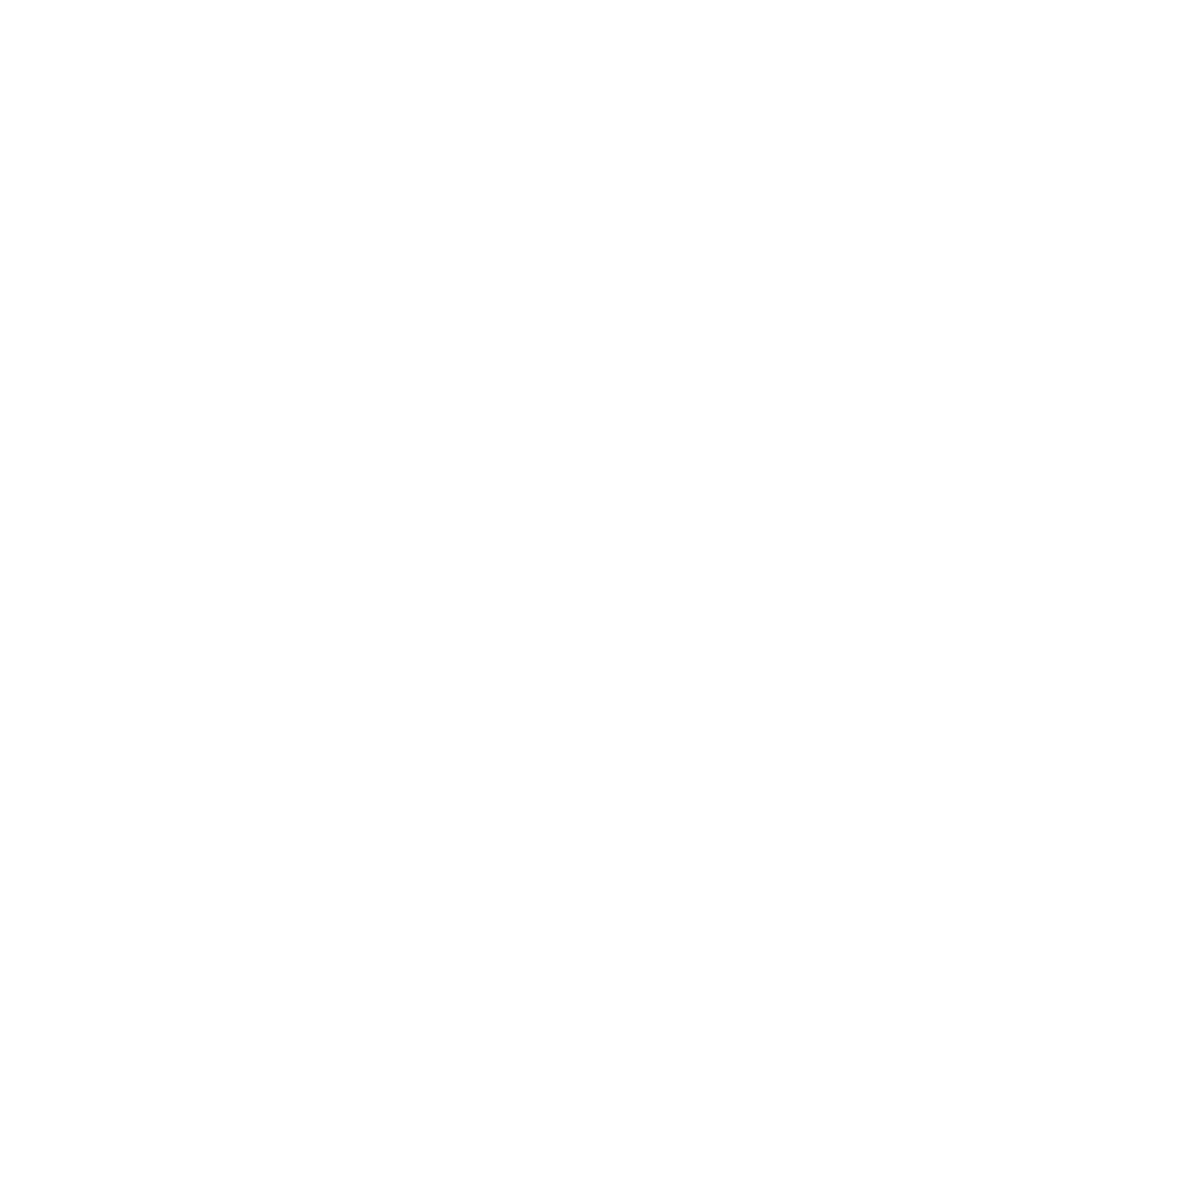

In [62]:
fig=pl.figure(figsize=(15,15))
ax=fig.add_subplot(111)
annual_power = []
for i in range(599):
    
    f = np.abs(np.fft.rfft(df_station[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[2:], (f[2:]), '-')
    annual_power.append(f[4])
#ax.set_xlim(1.0/104,1.0/15)
#ax.set_xticklabels([ "%s"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
#pl.xlabel("period (months)", fontsize=20)
#pl.ylabel("Power", fontsize=20)
#pl.title("Weekly swipe power spectrum", fontsize=20)